In [45]:
!kaggle datasets download -p ../Datasets -d jsphyg/weather-dataset-rattle-package --unzip


  0%|          | 0.00/3.83M [00:00<?, ?B/s]
 26%|██▌       | 1.00M/3.83M [00:03<00:09, 326kB/s]
 52%|█████▏    | 2.00M/3.83M [00:05<00:04, 421kB/s]
 78%|███████▊  | 3.00M/3.83M [00:07<00:01, 454kB/s]
100%|██████████| 3.83M/3.83M [00:08<00:00, 575kB/s]
100%|██████████| 3.83M/3.83M [00:08<00:00, 498kB/s]


In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
# Finding data files
import os

for dirname, _, filenames in os.walk('..\Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\Datasets\heart_failure.csv
..\Datasets\UCI-Wisconsin-Breast-Cancer-Dataset.csv
..\Datasets\weatherAUS.csv


In [48]:
file = r'..\Datasets\weatherAUS.csv'
df = pd.read_csv(file, header=0)

In [49]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [50]:
df_median = df.copy(deep=True)
df_mean = df.copy(deep=True)

In [51]:
df_median.isna().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [52]:
columns_to_fill = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                   'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                   'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

df_median[columns_to_fill] = df_median[columns_to_fill].fillna(df_median[columns_to_fill].median())


In [53]:
columns_to_interpolate = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

df_median[columns_to_interpolate] = df_median[columns_to_interpolate].fillna(method='ffill')

In [54]:
df_median.isna().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday         True
RainTomorrow      True
dtype: bool

In [55]:
df_median.shape

(145460, 23)

In [56]:
df_median.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        3261
RainTomorrow     3267
dtype: int64

In [57]:
df_median.dropna(inplace=True)

In [58]:
df_median.shape

(140787, 23)

In [59]:
df_median.isna().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [60]:
df_median

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,4.8,8.4,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No


In [61]:
direction_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

df_median['WindGust_NS'] = np.sin((df['WindGustDir'].map(direction_map))/np.pi*180)
df_median['WindGust_EW'] = np.cos((df['WindGustDir'].map(direction_map))/np.pi*180)
df_median['WindDir9am_NS'] = np.sin((df['WindDir9am'].map(direction_map))/np.pi*180)
df_median['WindDir9am_EW'] = np.cos((df['WindDir9am'].map(direction_map))/np.pi*180)
df_median['WindDir3pm_NS'] = np.sin((df['WindDir3pm'].map(direction_map))/np.pi*180)
df_median['WindDir3pm_EW'] = np.cos((df['WindDir3pm'].map(direction_map))/np.pi*180)

In [62]:
df_median

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGust_NS,WindGust_EW,WindDir9am_NS,WindDir9am_EW,WindDir3pm_NS,WindDir3pm_EW
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,16.9,21.8,No,No,0.611727,0.791069,0.611727,0.791069,0.982099,-0.188365
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,17.2,24.3,No,No,0.982099,-0.188365,-0.733055,-0.680169,-0.429382,0.903123
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,21.0,23.2,No,No,-0.429382,0.903123,0.611727,0.791069,-0.429382,0.903123
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,18.1,26.5,No,No,0.806075,-0.591813,0.323211,0.946327,-0.954091,-0.299515
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,17.8,29.7,No,No,0.611727,0.791069,-0.163819,-0.986490,0.275633,-0.961263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,4.8,8.4,E,31.0,ESE,...,9.4,20.9,No,No,-0.954091,-0.299515,-0.698236,0.715868,-0.954091,-0.299515
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,10.1,22.4,No,No,-0.954091,-0.299515,0.323211,0.946327,-0.163819,-0.986490
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,10.9,24.5,No,No,-0.733055,-0.680169,0.323211,0.946327,0.000000,1.000000
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,12.5,26.1,No,No,0.000000,1.000000,0.323211,0.946327,0.982099,-0.188365


In [63]:
df_median.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'WindGust_NS', 'WindGust_EW',
       'WindDir9am_NS', 'WindDir9am_EW', 'WindDir3pm_NS', 'WindDir3pm_EW'],
      dtype='object')

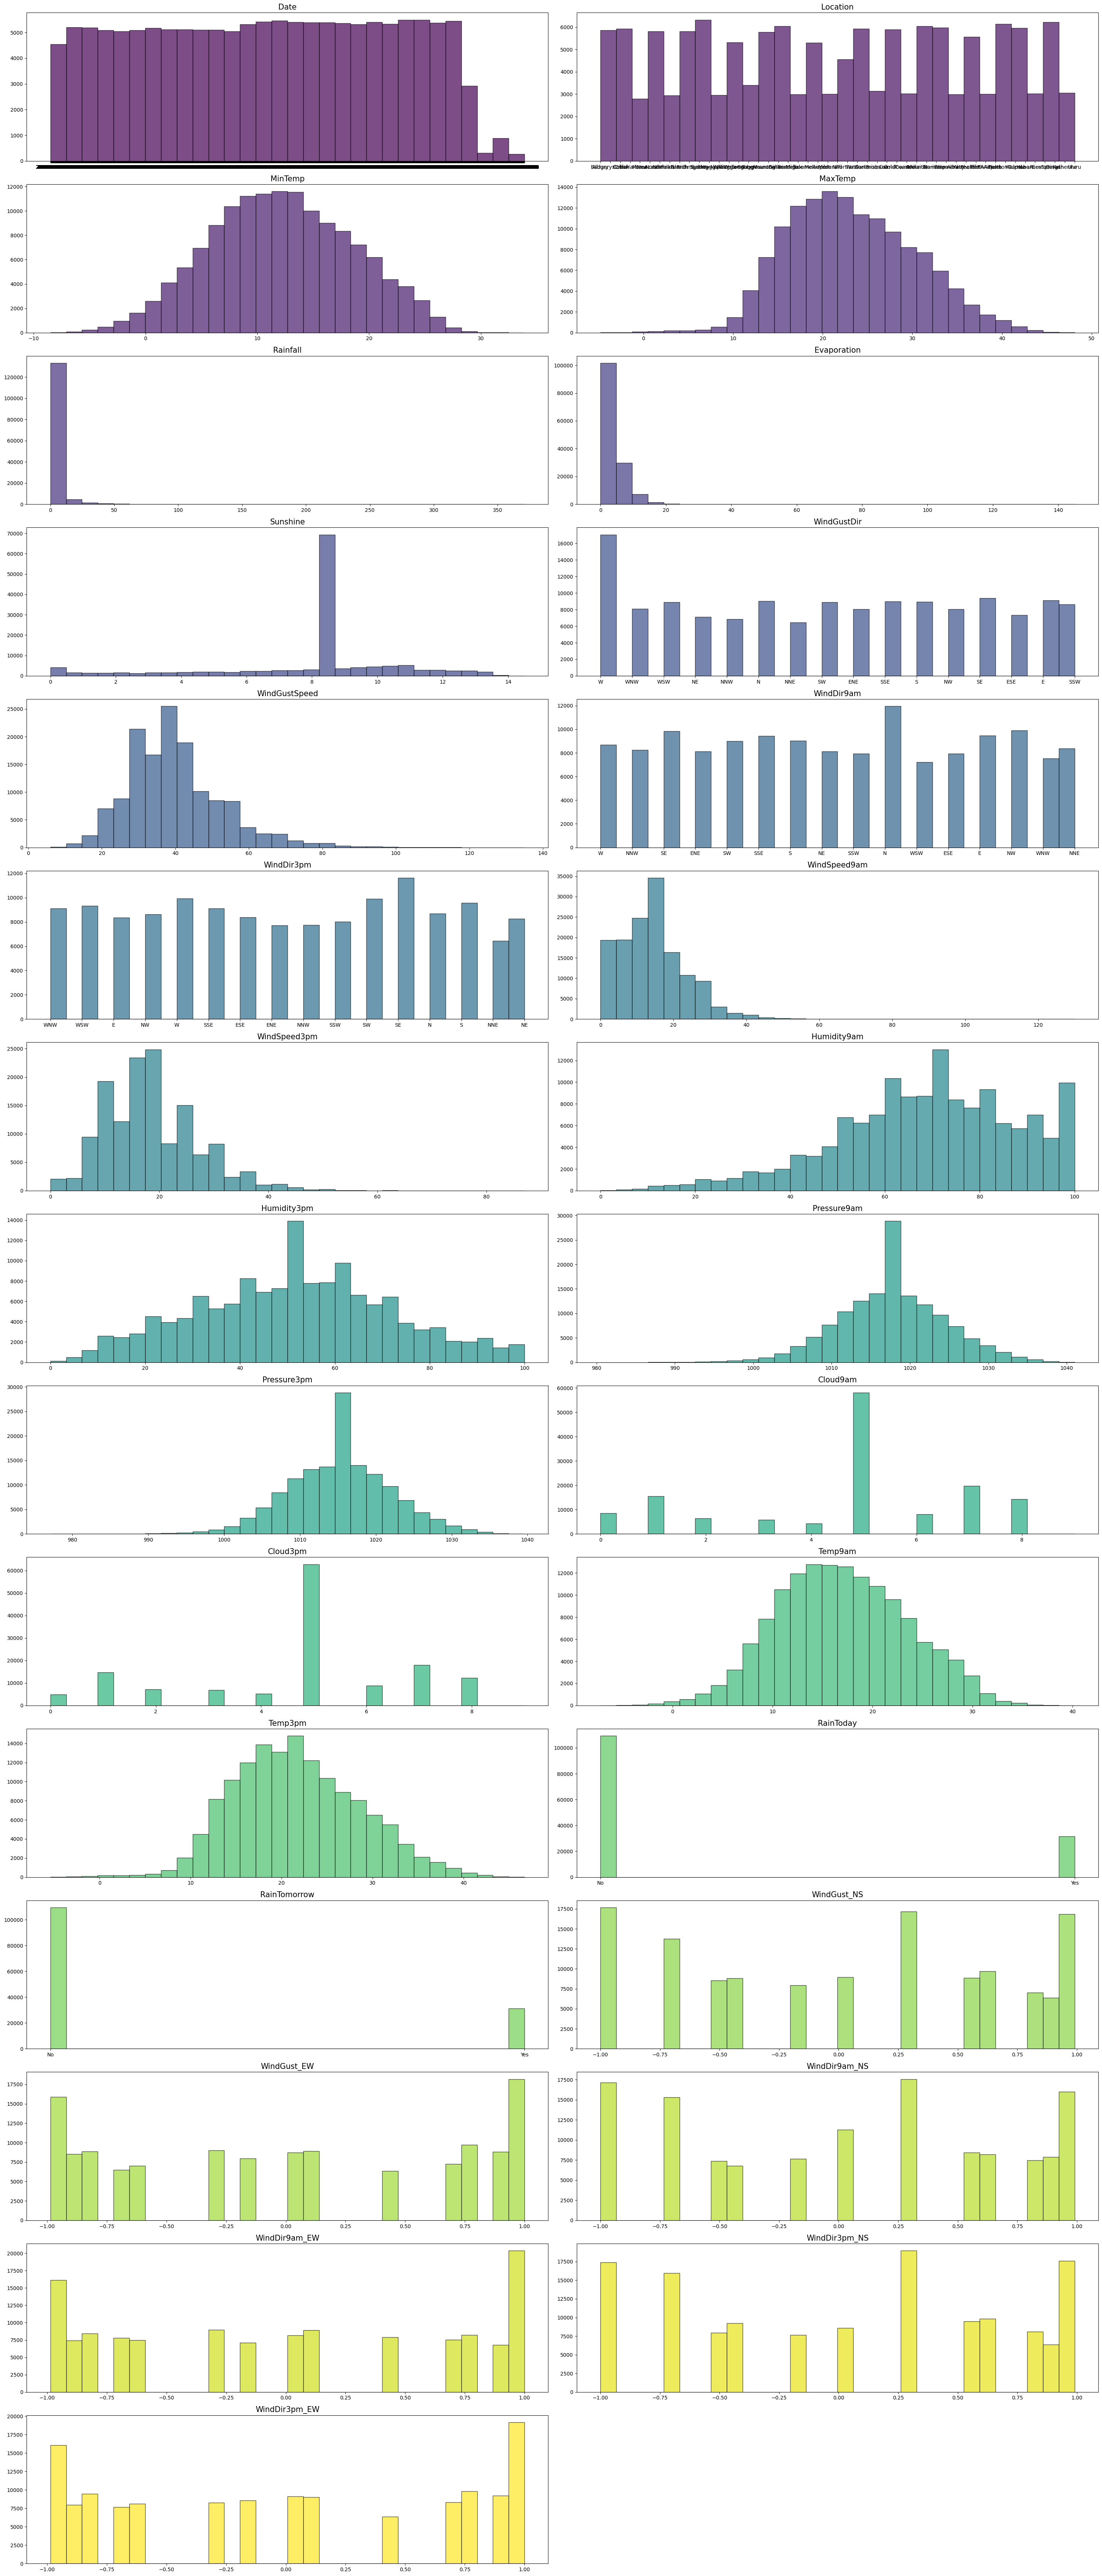

In [64]:
plt.rcParams['figure.figsize']=(30, 70)

fig, axes = plt.subplots(nrows=15, ncols=2, sharex=False, sharey=False)
colors = plt.cm.viridis(np.linspace(0, 1, len(df_median.columns)))

for col, ax, color in zip(df_median.columns, axes.flatten(), colors):
    ax.hist(df_median[col], bins=30, alpha=0.7, edgecolor='black', color=color)
    ax.set_title(col, fontsize=15)
    ax.set_xlim(auto=True)

for i in range(len(df_median.columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

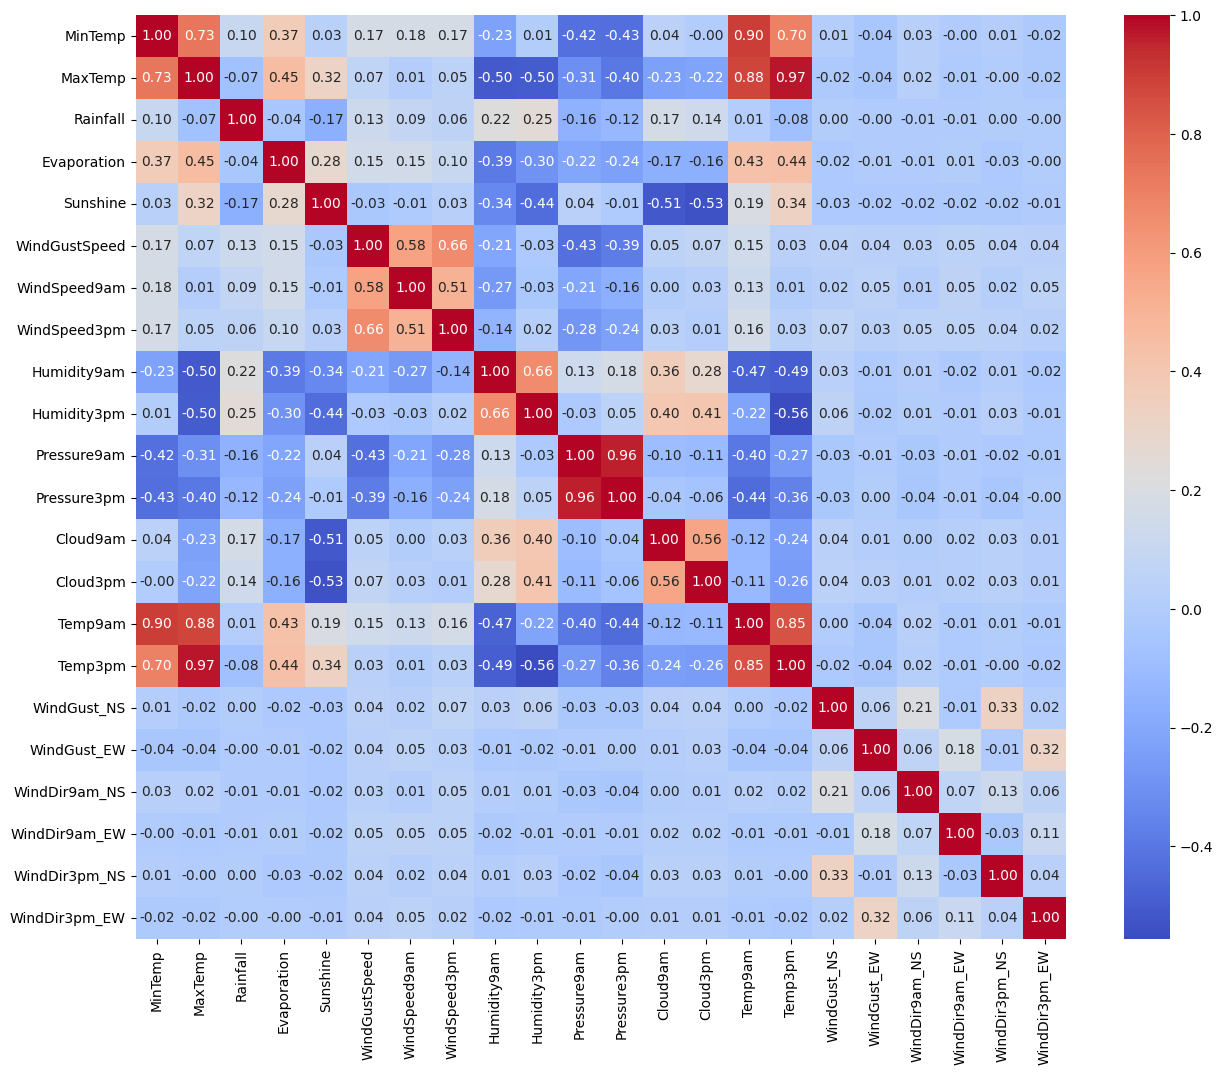

In [65]:
corr_matrix = df_median.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [66]:
"""locations = df_median['Location'].unique()

# Loop through each location
for location in locations:
    # Create a subset DataFrame for the current location
    location_df = df_median[df_median['Location'] == location]

    # Create a correlation matrix for the subset DataFrame
    corr_matrix = location_df.corr(numeric_only=True)

    # Plot the heatmap
    plt.figure(figsize=(15, 12))
    plt.title(f'Correlation Matrix - {location}')
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()"""

'locations = df_median[\'Location\'].unique()\n\n# Loop through each location\nfor location in locations:\n    # Create a subset DataFrame for the current location\n    location_df = df_median[df_median[\'Location\'] == location]\n\n    # Create a correlation matrix for the subset DataFrame\n    corr_matrix = location_df.corr(numeric_only=True)\n\n    # Plot the heatmap\n    plt.figure(figsize=(15, 12))\n    plt.title(f\'Correlation Matrix - {location}\')\n    sns.heatmap(corr_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f")\n    plt.show()'